# Mieszany Proces Poissona

In [1]:
using Plots

In [2]:
fₓ(λ)=-log(rand())/λ

fₓ (generic function with 1 method)

In [3]:
JPP(λ,T)=begin
    Jump=[.0]
    while Jump[end]<T
        push!(Jump,Jump[end]+fₓ(λ))
    end
    Jump[1:end]
end

JPP (generic function with 1 method)

In [4]:
JPP(1/2,10)

5-element Vector{Float64}:
  0.0
  0.072853614161871
  8.400876218104141
  9.793058335334763
 10.517286497590392

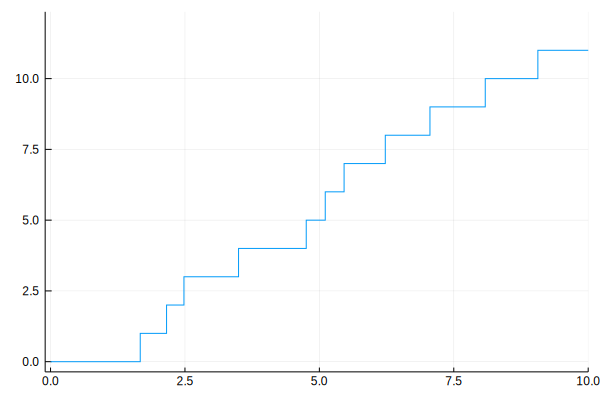

In [5]:
temp=JPP(1,10)
plot(temp,0:length(temp)-1, linetype=:steppost)#, ylim=(-0.2,length(temp)))
plot!(xlim=(-0.1,10),leg=false)

In [36]:
function Foo()
    x::Int = -1
    setx(x_) = (x = x_) 
    getx() = x
    () -> getx()
    (t) -> getx() *t
end


Foo (generic function with 1 method)

In [37]:
A=Foo()

#31 (generic function with 1 method)

In [38]:
A.getx()

-1

In [41]:
A(3)

-3

In [96]:
function Λ(λ,T)
    #Λ(T,λ)=new(JPP(λ,T)[2:end])
    jump::Vector=JPP(λ,T)[2:end]
    (t) -> begin
        a=1
        while jump[a]<t
            a+=1
        end
        a-=1
    end
    #(T,λ) -> begin
    #    jump=JPP(λ,T)[2:end]
    #end
end

Λ (generic function with 2 methods)

In [125]:
A=Λ(10,10)

#62 (generic function with 1 method)

In [126]:
A(2)

15

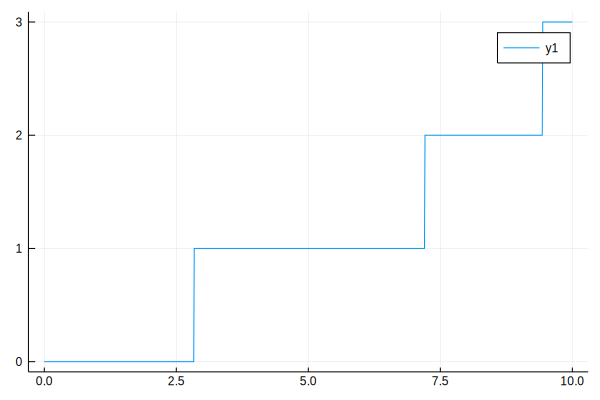

In [127]:
A=Λ(1/2,10)
plot(t->A(t), 0:0.01:10)

In [11]:
mutable struct Jump
    jump::Vector
    Jump(λ=1,T=10)=new(JPP(λ,T)[2:end])
    Λ(t)=begin
        a=1
        while jump[a]<t
            a+=1
        end
        a-=1
    end
    (t)->Λ(t)
end

In [ ]:
mutable struct Jump
    jump::Vector
    Jump(λ=1,T=10)=new(JPP(λ,T)[2:end])
    Λ(t)=begin
        a=1
        while jump[a]<t
            a+=1
        end
        a-=1
    end
    (t)->Λ(t)
end

In [13]:
Jump()

LoadError: MethodError: objects of type Jump are not callable

In [48]:
A=Jump()

Jump([1.3062607098864858, 2.7287114501155436, 5.431450568461226, 6.702231150140191, 7.038812887814989, 7.250191311877491, 7.9749100265012345, 8.964463898082098, 9.488744206001858, 10.681905683254056])

In [55]:
A.Λ(2)

LoadError: type Jump has no field Λ

In [43]:
Λ(t,jj::Jump)=begin
    a=1
    while jj.jump[a]<t
        a+=1
    end
    a-=1
end

Λ (generic function with 2 methods)

In [44]:
Λ(0.5,A)

1

In [62]:
function Foo()
      x::Int = -1
      setx(x_) = (x = x_) 
      getx() = x
      () -> (getx;setx)
      (t) -> getx()*t
end


Foo (generic function with 1 method)

In [63]:
f = Foo()

#17 (generic function with 1 method)

In [66]:
f(4)

-4

In [53]:
f.setx(22)

22